<a href="https://colab.research.google.com/github/bhadreshpsavani/Car-Price-Prediction-/blob/master/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from datetime import date
from keras.utils import to_categorical

In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/CarPricePrediction/data.csv")

In [49]:
df, test_data = train_test_split(data, test_size=0.2, shuffle=True)
print(len(df), len(test_data))

2712 678


## Checking Values and Data Type in each Columns

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 142 to 369
Data columns (total 18 columns):
car_company          2712 non-null object
model_ID             2712 non-null object
mileage              2712 non-null int64
engine_power         2712 non-null int64
registration_date    2712 non-null object
fuel                 2712 non-null object
car_paint_color      2712 non-null object
car_type             2712 non-null object
feature1             2712 non-null bool
feature2             2712 non-null bool
feature3             2712 non-null bool
feature4             2712 non-null bool
feature5             2712 non-null bool
feature6             2712 non-null bool
feature7             2712 non-null bool
feature8             2712 non-null bool
sold_date            2712 non-null object
car_price            2712 non-null int64
dtypes: bool(8), int64(3), object(7)
memory usage: 254.2+ KB
None


In [51]:
for i in range(df.shape[1]):
    if df.iloc[:,i].dtype == 'object':
        print(df.iloc[:,i].value_counts())
    else:
        print(df.iloc[:,i].describe())

Edureka_motors    2712
Name: car_company, dtype: int64
320                  416
520                  355
318                  320
X3                   238
116                  212
X1                   155
X5                   131
316                  128
525                  101
118                   83
530                   81
318 Gran Turismo      62
320 Gran Turismo      46
518                   38
X6                    30
420                   29
X4                    28
535                   27
420 Gran Coupé        17
120                   17
730                   15
520 Gran Turismo      13
530 Gran Turismo      12
640 Gran Coupé        12
330                   11
218 Active Tourer     10
325                   10
X5 M                   8
740                    8
114                    7
                    ... 
418 Gran Coupé         4
218 Gran Tourer        4
640                    4
216 Gran Tourer        4
Z4                     3
125                    3
328                 

## Visulizing Car Price Distribution


 mu = 15778.10 and sigma = 8965.99

Skewness: 2.716905


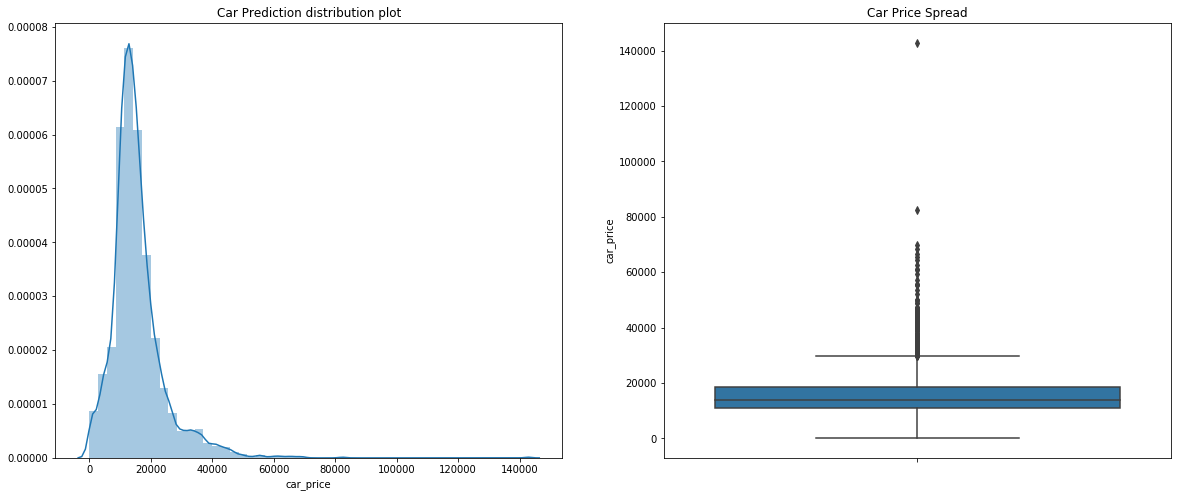

In [52]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['car_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title("Car Prediction distribution plot")
sns.distplot(df["car_price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["car_price"])

print("Skewness: %f" % df['car_price'].skew())

## Visulizing Categorical Data

[Text(0, 0.5, 'frequency of car type'), Text(0.5, 0, 'car type')]

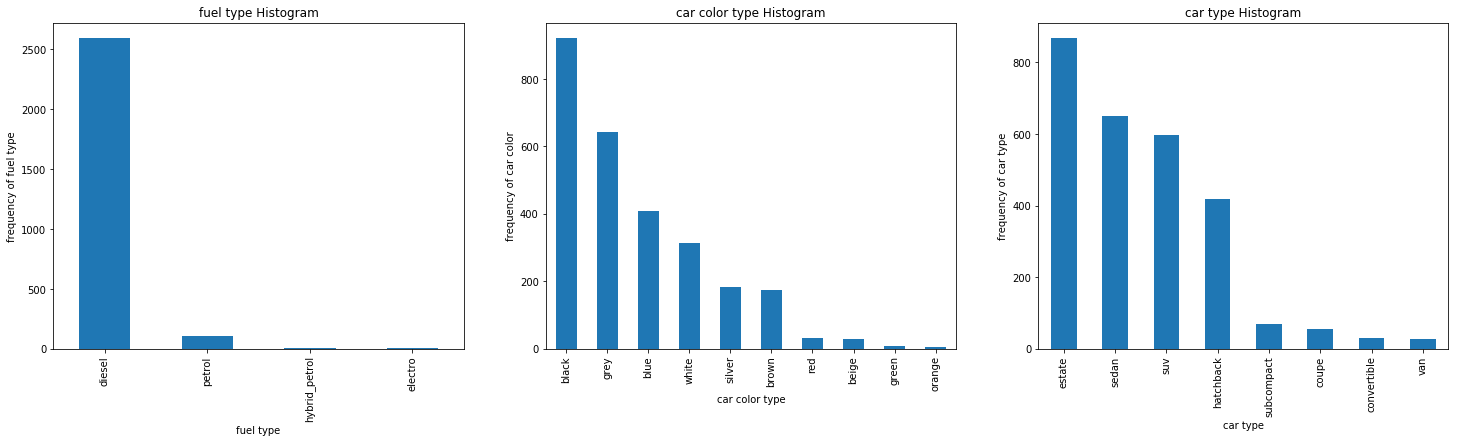

In [53]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=df['fuel'].value_counts().plot('bar')
plt.title("fuel type Histogram")
plt1.set(xlabel='fuel type', ylabel="frequency of fuel type")

plt.subplot(1,3,2)
plt1=df['car_paint_color'].value_counts().plot('bar')
plt.title("car color type Histogram")
plt1.set(xlabel='car color type', ylabel="frequency of car color")

plt.subplot(1,3,3)
plt1=df['car_type'].value_counts().plot('bar')
plt.title("car type Histogram")
plt1.set(xlabel='car type', ylabel="frequency of car type")

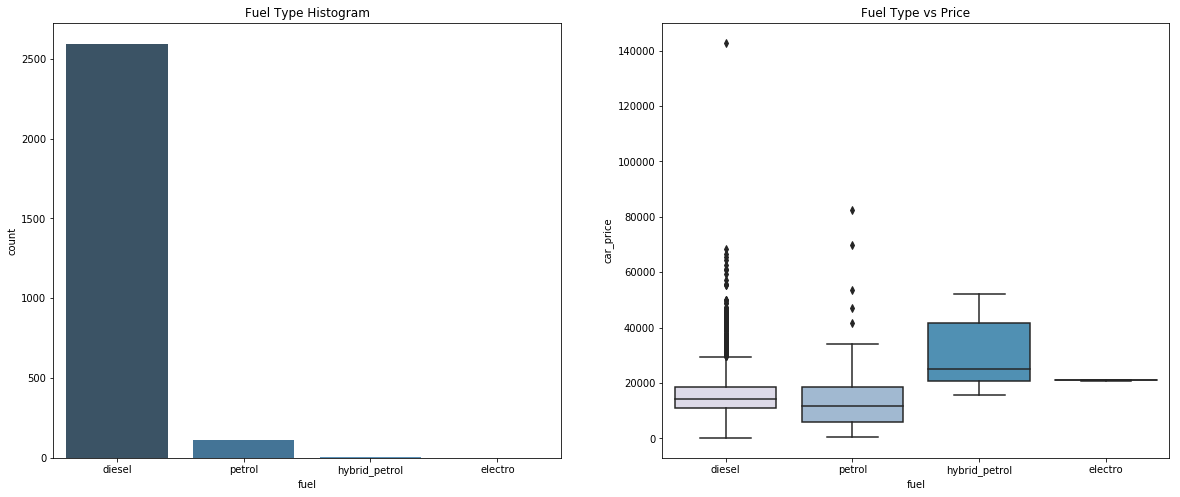

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df['fuel'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df['fuel'], y=df['car_price'], palette=("PuBuGn"))

plt.show()

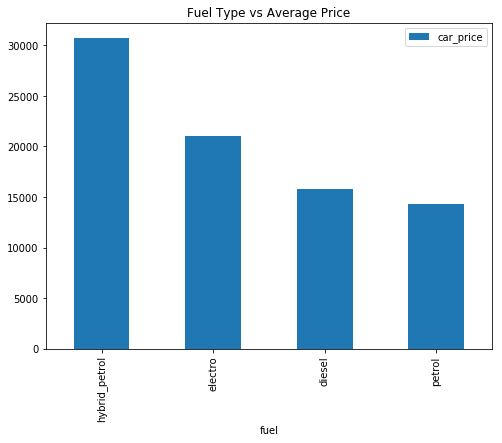

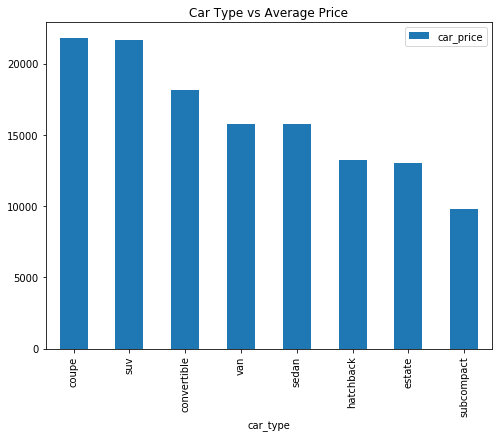

In [55]:
df1 = pd.DataFrame(df.groupby(['fuel'])['car_price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['car_type'])['car_price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Car Type vs Average Price')
plt.show()

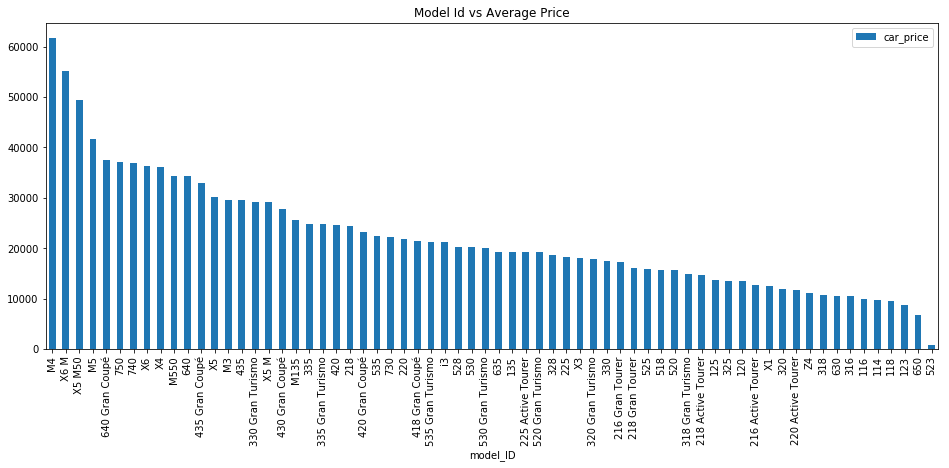

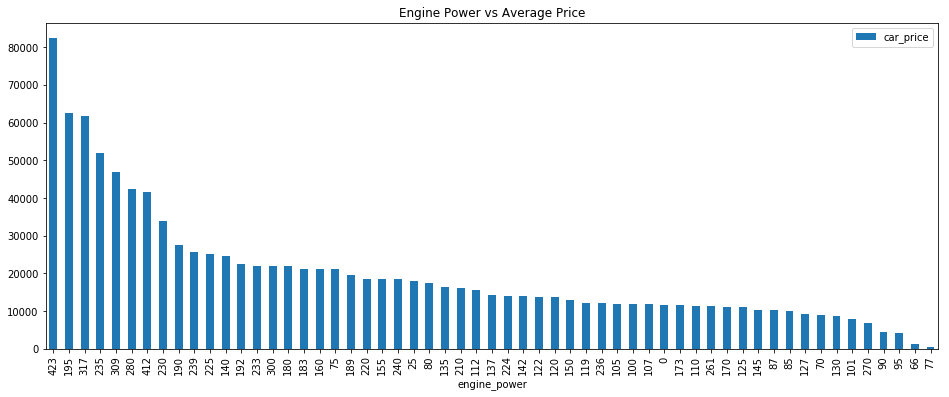

In [56]:
df3 = pd.DataFrame(df.groupby(['model_ID'])['car_price'].mean().sort_values(ascending = False))
df3.plot.bar(figsize=(16,6))
plt.title('Model Id vs Average Price')
plt.show()

df4 = pd.DataFrame(df.groupby(['engine_power'])['car_price'].mean().sort_values(ascending = False))
df4.plot.bar(figsize=(16,6))
plt.title('Engine Power vs Average Price')
plt.show()

## Visulizing  Numeric Data

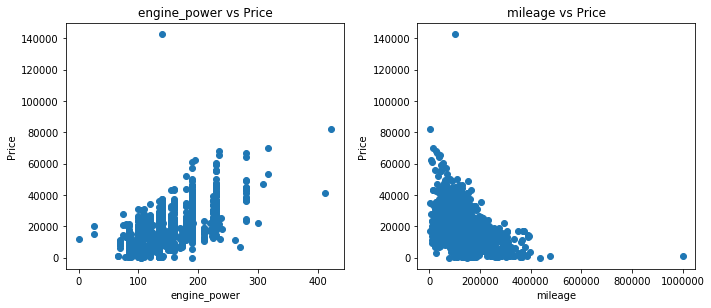

In [57]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['car_price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('engine_power', 1)
scatter('mileage', 2)
plt.tight_layout()

Size of database before removing Outliers : 2712
Size of database after removing Outliers : 2708


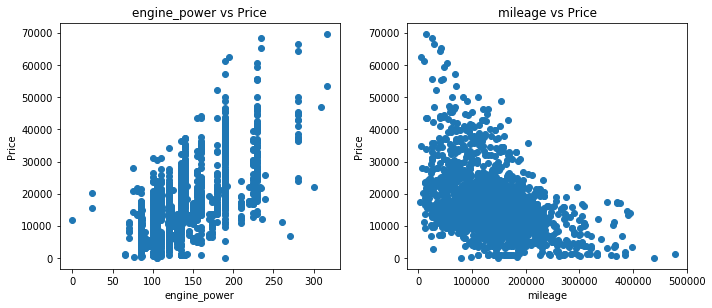

In [58]:
#Deleting outliers
print("Size of database before removing Outliers : "+ str(len(df)))
df = df.drop(df[(df['engine_power']>350) | (df['car_price']>100000)].index)
df = df.drop(df[(df['mileage']>600000) | (df['car_price']>100000)].index)
print("Size of database after removing Outliers : "+ str(len(df)))
plt.figure(figsize=(10,20))
scatter('engine_power', 1)
scatter('mileage', 2)
plt.tight_layout()


 mu = 15702.36 and sigma = 8519.52

Skewness: 1.788423


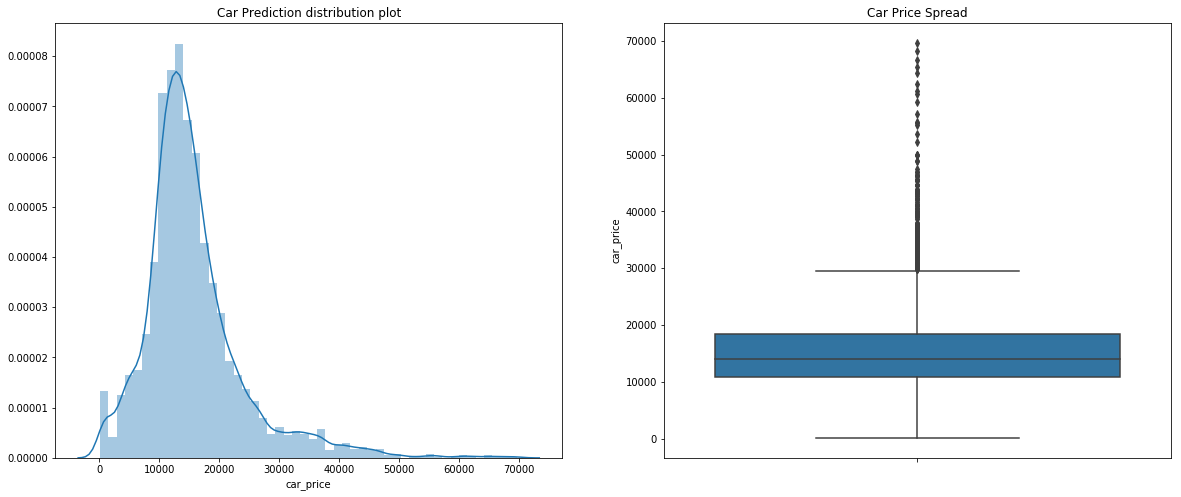

In [59]:
# Car Price Distribution after removal of few data
(mu, sigma) = norm.fit(df['car_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % df['car_price'].skew())
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.title("Car Prediction distribution plot")
sns.distplot(df["car_price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["car_price"])

# Preprocessing:
1. Dataset Conversion
2. Normalization 

## Dataset Conversion
1. Converted **Categorical Dataset** in to **Numeric**
2. Converted **Boolean Columns** in to **Numeric**
3. Converted **Registration Date** and **Sold Date** in to **Duration of use** because duration is more relavent to predict the price of the car 


In [0]:
def categorical_to_int(df):
  model_dict= {value:i+1 for i, value in enumerate(df['model_ID'].unique())}
  fuel_dict= {value:i+1 for i, value in enumerate(df['fuel'].unique())}
  color_dict= {value:i+1 for i, value in enumerate(df['car_paint_color'].unique())}
  car_type_dict= {value:i+1 for i, value in enumerate(df['car_type'].unique())}
  df=df.replace({'model_ID': model_dict})
  df=df.replace({'fuel': fuel_dict})
  df=df.replace({'car_paint_color': color_dict})
  df=df.replace({'car_type': car_type_dict})
  return df

def findDaysOfCarUse(reg_date_list, sold_date_list):
  """
  This function will return duration of use by getting date of registration and date of sold
  """
  car_use_days=list()
  for i in range(len(reg_date_list)):
    reg_date_str=reg_date_list[i].split('-')
    sold_date_str=sold_date_list[i].split('-')
    d1=date(int(reg_date_str[2]), int(reg_date_str[1]), int(reg_date_str[0]))
    d2=date(int(sold_date_str[2]), int(sold_date_str[1]), int(sold_date_str[0]))
    car_use_days.append((d2-d1).days)
  return car_use_days

def convert_bool_to_int(df):
  #lets replace numpy boolean type to integer in the feature columns
  df['feature1']=df['feature1'].values.astype(int)
  df['feature2']=df['feature2'].values.astype(int)
  df['feature3']=df['feature3'].values.astype(int)
  df['feature4']=df['feature4'].values.astype(int)
  df['feature5']=df['feature5'].values.astype(int)
  df['feature6']=df['feature6'].values.astype(int)
  df['feature7']=df['feature7'].values.astype(int)
  df['feature8']=df['feature8'].values.astype(int)
  return df

In [0]:
def DataConversion(df):
  #Car Company is same throughout this entire dataset so it will not going to help in car prediction so we will drop the column
  df=df.drop(['car_company'], axis=1)

  #convert categorical columns to inetegers
  df=categorical_to_int(df)

  #get duration of car use
  reg_date_list=df['registration_date'].values
  sold_date_list=df['sold_date'].values
  car_use_days=findDaysOfCarUse(reg_date_list, sold_date_list)

  #drop registration_date and sold_date data and add car_use_duration in days
  df=df.drop(['registration_date','sold_date'], axis=1)
  df.insert(2, 'car_use_duration', car_use_days)

  #lets replace numpy boolean type to integer in the feature columns
  df=convert_bool_to_int(df)
  return df

In [62]:
proc_df=DataConversion(df)
proc_df.head()

,model_ID,mileage,car_use_duration,engine_power,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,car_price
142,1,131871,1826,100,1,1,1,0,1,0,0,0,1,1,0,13800
2215,2,58960,1308,190,1,1,2,1,1,1,1,1,1,0,1,45500
2340,3,118089,1339,135,1,2,3,0,1,0,0,1,1,1,1,24000
3272,4,150458,1673,135,1,3,3,0,1,0,0,0,0,1,1,14300
936,5,136581,1765,160,1,3,1,1,1,0,0,1,1,1,1,16500


In [63]:
for i in range(proc_df.shape[1]):
    if proc_df.iloc[:,i].dtype == 'object':
        print(proc_df.iloc[:,i].value_counts())
    else:
        print(proc_df.iloc[:,i].describe())

count    2708.000000
mean       11.702363
std        10.488337
min         1.000000
25%         4.000000
50%         8.000000
75%        18.000000
max        65.000000
Name: model_ID, dtype: float64
count      2708.000000
mean     141791.331241
std       59945.627129
min        2399.000000
25%      103296.250000
50%      142443.500000
75%      176033.500000
max      477571.000000
Name: mileage, dtype: float64
count     2708.000000
mean      1986.255539
std        924.338377
min        306.000000
25%       1489.000000
50%       1795.000000
75%       2130.000000
max      10258.000000
Name: car_use_duration, dtype: float64
count    2708.000000
mean      128.455687
std        38.406357
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       317.000000
Name: engine_power, dtype: float64
count    2708.000000
mean        1.046160
std         0.230024
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
N

## Visulizing Dataset and InterRelation Between Features

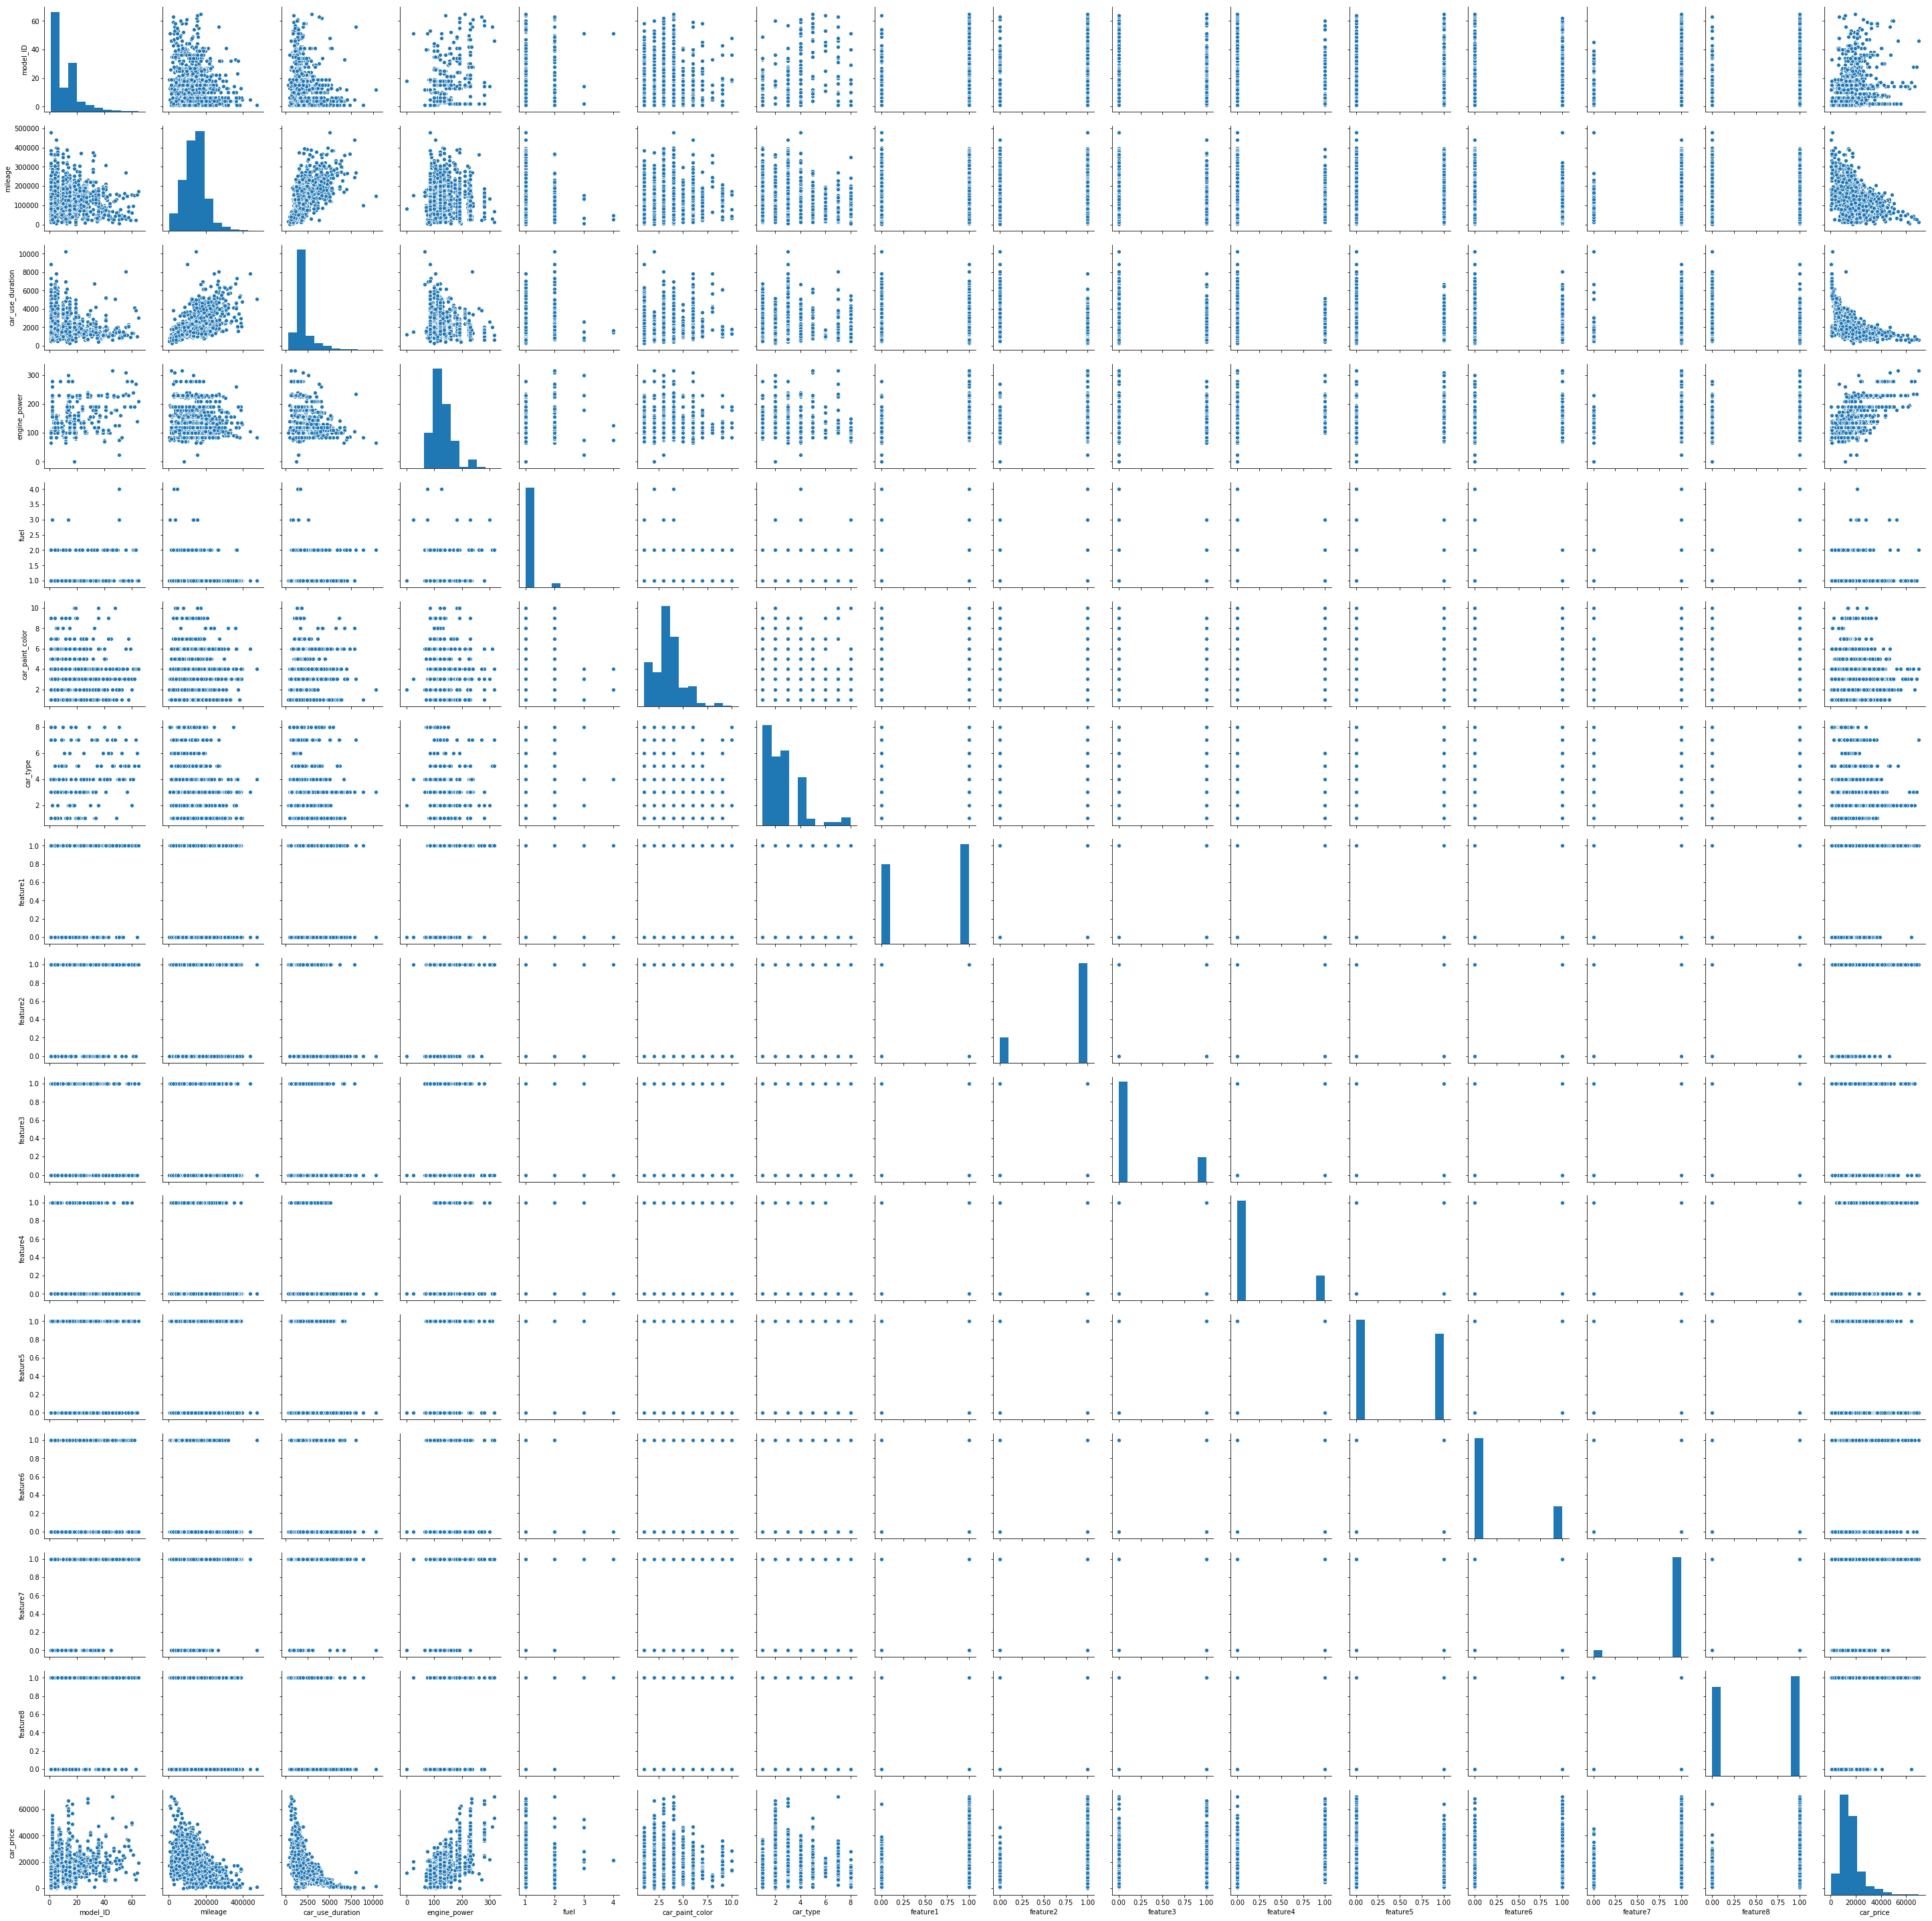

<Figure size 1440x1260 with 0 Axes>

In [64]:
sns.pairplot(proc_df)
plt.figure(figsize = (20, 17.5))
plt.show()

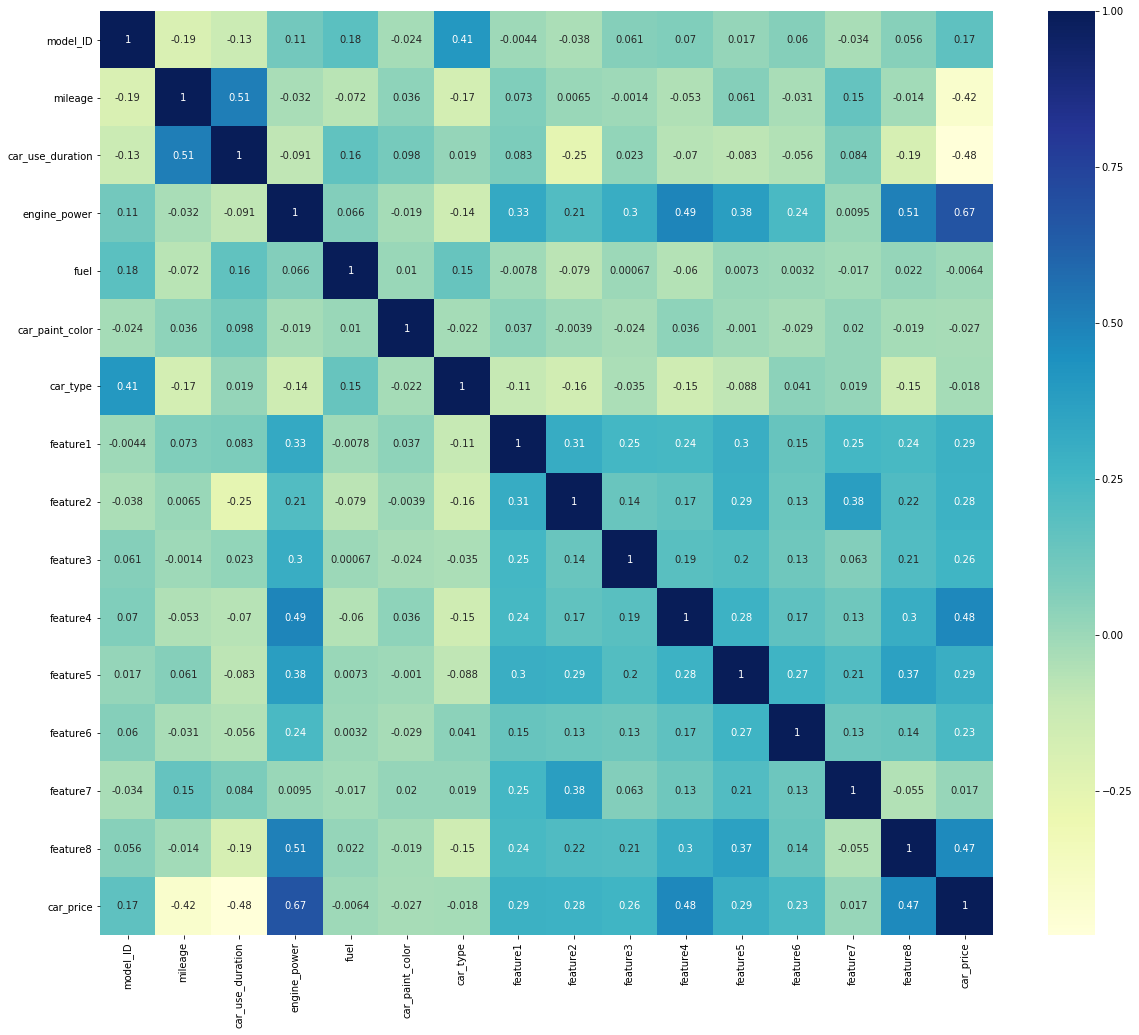

In [65]:
#Correlation using heatmap
plt.figure(figsize = (20, 17))
sns.heatmap(proc_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [0]:
data_y=proc_df['car_price'].values
data_x=proc_df.drop(['car_price'], axis=1).values

## Normalizing Data
Car Price has higher values which can cause problem to the model while training, It is better to normalize car price and other features
1. For Car price we will tranform it in the range (0, 1) by dividing it by max value
2. For all the other Features we will use min-max scaler to transform it in the range (0, 1)

In [80]:
#normalize car price for train_data
max_car_price=max(data_y)
data_y=data_y/max_car_price
print(data_y[:10])

[0.19799139 0.6527977  0.34433286 0.20516499 0.23672884 0.25968436
 0.27546628 0.46054519 0.35581062 0.16929699]


In [0]:
def normalization(data_x):
  scaler=MinMaxScaler()
  scaler.fit(data_x)
  x_train_scaled=scaler.transform(data_x)
  return x_train_scaled

In [82]:
x_train_scaled=normalization(data_x)

# print dataset properties before and after scaling
print("transformed shape: {}".format(x_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(data_x.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(data_x.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
 x_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
 x_train_scaled.max(axis=0)))


transformed shape: (2708, 15)
per-feature minimum before scaling:
 [   1 2399  306    0    1    1    1    0    0    0    0    0    0    0
    0]
per-feature maximum before scaling:
 [    65 477571  10258    317      4     10      8      1      1      1
      1      1      1      1      1]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Build Regression model 

## Linear Regressor Using scikit-learn

In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train_scaled, data_y, test_size=0.2, shuffle=True)
print(len(y_train), len(y_valid))

2166 542


In [84]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5).fit(X_train, y_train)
print("Training set score: {:.2f}".format(GBoost.score(X_train, y_train)))
print("Test set score: {:.2f}".format(GBoost.score(X_valid, y_valid)))

Training set score: 0.96
Test set score: 0.88


In [85]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11).fit(X_train, y_train)
print("Training set score: {:.2f}".format(model_lgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_lgb.score(X_valid, y_valid)))

Training set score: 0.90
Test set score: 0.87


# Prediction

In [86]:
y_test=test_data['car_price'].values
X_test=test_data.drop(['car_price'], axis=1)

def test(X_test):
  X_test=DataConversion(X_test)
  X_test=normalization(X_test)
  output1 = GBoost.predict(X_test)*max_car_price
  output2 = model_lgb.predict(X_test)*max_car_price
  output=[int((output1[i]+output2[i])/2)for i in range(len(output1))]
  return output

car_price_pred=test(X_test)
print(car_price_pred[:10])

[10831, 8803, 17694, 14371, 9246, 42705, 14484, 17789, 14523, 9951]


In [0]:
output = pd.DataFrame()
output['Output'] = car_price_pred
output.to_csv('submission.csv', index=False)

In [88]:
(car_price_pred[:10])

[10831, 8803, 17694, 14371, 9246, 42705, 14484, 17789, 14523, 9951]